# Airbnb Analysis Project

Aim: To analyse prices and expected earnings from airbnb rental properties


In [2]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
listings_data = pd.read_csv("sydney/oct15/listings.csv", )
listings_data2 = pd.read_csv("sydney/oct15/listings2.csv", )

In [4]:

listings_data = listings_data.drop(['neighbourhood_group'], 1)

listings_data2 = listings_data2.drop(['license', 'jurisdiction_names', 'neighbourhood_group_cleansed'], 1)
listings_data3 = listings_data2.drop(['space', 'summary', 'description', 'neighborhood_overview', 'notes','transit','medium_url', 'thumbnail_url', 'xl_picture_url' ,'requires_license'], 1)

In [5]:
listings_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3669962,Views of the Pittwater,6515353,Robert,Pittwater,-33.650456,151.311718,Private room,95,1,13,2015-08-17,1.37,1,355
1,4849322,Do you enjoy a beaches lifestyle?,5409864,Annie,Pittwater,-33.708198,151.289642,Private room,85,1,10,2015-09-27,1.39,1,363
2,7699749,Relaxing Spacious Beach Retreat,40445574,Tania,Pittwater,-33.672962,151.313276,Entire home/apt,700,7,0,NaN,NaN,1,76
3,769911,Whale Beach Garden Retreat,465560,Elaine,Pittwater,-33.619487,151.337180,Entire home/apt,131,2,2,2012-12-11,0.06,4,322
4,7623002,Newport Beach Sydney Sun Catcher,19810434,Jill,Pittwater,-33.660680,151.313584,Entire home/apt,150,1,2,2015-08-23,1.05,1,90


In [6]:
listings_price = listings_data[['id','price']]



In [7]:
listings_data4 = pd.merge(listings_data3, listings_price, on='id')

In [8]:
listings_data4.corr(method='pearson', min_periods=40)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_y
id,1.000000e+00,1.233235e-15,5.613279e-01,2.454433e-02,2.454433e-02,-3.810427e-03,-3.155662e-02,-3.765970e-02,3.977864e-03,-3.572373e-02,...,-1.818013e-02,7.481856e-03,2.409740e-02,-4.326431e-02,-3.549385e-02,8.278129e-03,5.704037e-02,-2.449536e-03,2.349289e-01,-3.280274e-02
scrape_id,1.233235e-15,1.000000e+00,-7.877378e-16,2.361489e-15,2.361489e-15,1.589435e-12,-6.670609e-13,-1.975004e-14,1.644982e-14,-3.785344e-14,...,-4.993476e-17,-4.171170e-16,-2.781312e-16,-1.680131e-15,-1.218239e-15,4.104835e-16,-4.117131e-16,-6.722522e-15,4.053667e-15,6.561840e-15
host_id,5.613279e-01,-7.877378e-16,1.000000e+00,-1.674731e-01,-1.674731e-01,5.117146e-02,-6.861923e-02,-5.132010e-02,1.692005e-02,-3.295263e-02,...,-1.387100e-02,1.474461e-02,1.252316e-02,-1.300524e-02,-1.961824e-02,-1.327389e-02,4.872776e-02,-1.127758e-01,1.489636e-01,-4.799033e-02
host_listings_count,2.454433e-02,2.361489e-15,-1.674731e-01,1.000000e+00,1.000000e+00,-5.588887e-02,2.003747e-02,1.960421e-01,1.320415e-01,1.706026e-01,...,-9.737074e-02,-6.514059e-02,-5.217867e-02,-1.716375e-01,-1.834430e-01,-4.116871e-02,-1.034552e-01,7.813441e-01,-8.187349e-02,1.317487e-01
host_total_listings_count,2.454433e-02,2.361489e-15,-1.674731e-01,1.000000e+00,1.000000e+00,-5.588887e-02,2.003747e-02,1.960421e-01,1.320415e-01,1.706026e-01,...,-9.737074e-02,-6.514059e-02,-5.217867e-02,-1.716375e-01,-1.834430e-01,-4.116871e-02,-1.034552e-01,7.813441e-01,-8.187349e-02,1.317487e-01
latitude,-3.810427e-03,1.589435e-12,5.117146e-02,-5.588887e-02,-5.588887e-02,1.000000e+00,1.867230e-01,1.448406e-01,1.043375e-01,1.667588e-01,...,3.605236e-02,1.144161e-02,3.830894e-02,2.171836e-02,2.481041e-02,7.519560e-03,-3.511331e-03,-7.036258e-02,-3.888666e-02,1.228878e-01
longitude,-3.155662e-02,-6.670609e-13,-6.861923e-02,2.003747e-02,2.003747e-02,1.867230e-01,1.000000e+00,1.472321e-01,5.929507e-02,1.712126e-01,...,3.299676e-02,1.056789e-02,-6.077753e-03,2.919226e-02,2.581714e-02,1.791826e-01,-2.874353e-02,5.640541e-02,-9.430070e-02,1.860087e-01
accommodates,-3.765970e-02,-1.975004e-14,-5.132010e-02,1.960421e-01,1.960421e-01,1.448406e-01,1.472321e-01,1.000000e+00,6.081001e-01,8.281702e-01,...,-9.350608e-03,-7.354475e-03,-1.996657e-02,-2.279952e-02,-2.440733e-02,1.111845e-02,-6.450554e-02,2.420652e-01,-9.368406e-02,5.265753e-01
bathrooms,3.977864e-03,1.644982e-14,1.692005e-02,1.320415e-01,1.320415e-01,1.043375e-01,5.929507e-02,6.081001e-01,1.000000e+00,6.033000e-01,...,7.788354e-03,-1.707088e-03,-2.534833e-02,-2.305546e-02,-2.547768e-02,-1.487069e-02,-1.980894e-02,1.589735e-01,-1.080656e-01,4.560041e-01
bedrooms,-3.572373e-02,-3.785344e-14,-3.295263e-02,1.706026e-01,1.706026e-01,1.667588e-01,1.712126e-01,8.281702e-01,6.033000e-01,1.000000e+00,...,3.750224e-02,2.995866e-02,5.174426e-04,1.237185e-02,9.287389e-03,2.284008e-02,-2.550601e-02,1.954698e-01,-1.867949e-01,5.461285e-01


/Users/adrian/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.01510021203e+13, right=2.01510021203e+13
  'left=%s, right=%s') % (left, right))
/Users/adrian/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2.01510021203e+13, top=2.01510021203e+13
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c77d5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x140a98950>]], dtype=object)

/Users/adrian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


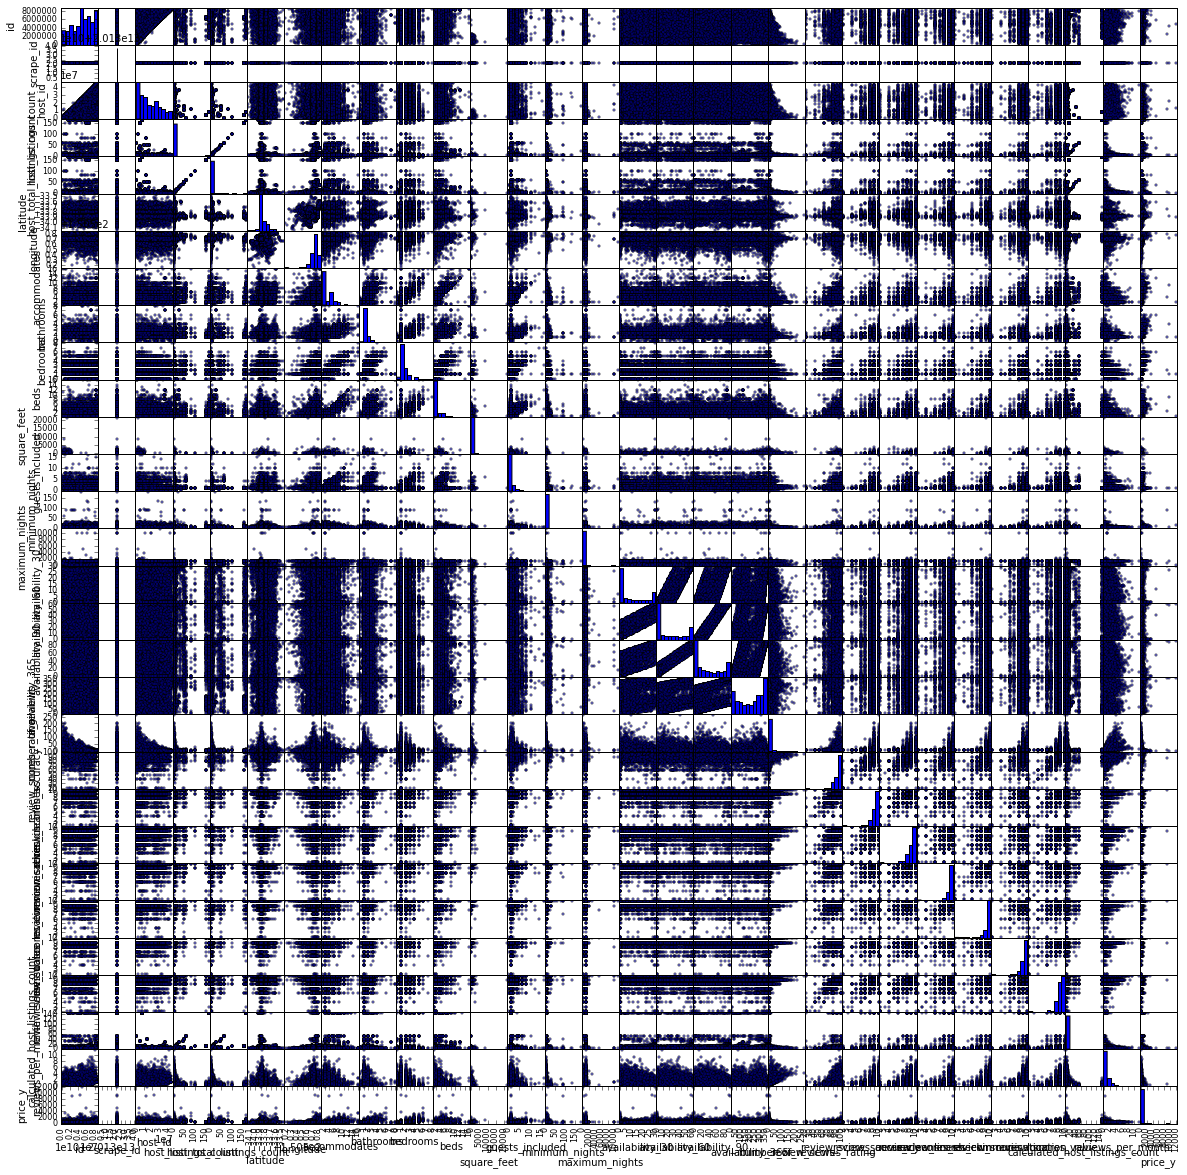

In [9]:
pd.scatter_matrix(listings_data4, figsize=(20,20))

In [10]:
# define X and y  
data = listings_data4[['price_y','bedrooms','latitude','longitude', 'beds', 'accommodates' , 'bathrooms', 'review_scores_value', 'review_scores_rating','review_scores_accuracy' ,'availability_30','availability_60','availability_90','availability_365','host_total_listings_count','host_listings_count','review_scores_location','reviews_per_month' ,'number_of_reviews']]

data.dropna(inplace=True)

y = data['price_y']
X = data.drop(['price_y'], 1)

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test.head()

/Users/adrian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bedrooms,latitude,longitude,beds,accommodates,bathrooms,review_scores_value,review_scores_rating,review_scores_accuracy,availability_30,availability_60,availability_90,availability_365,host_total_listings_count,host_listings_count,review_scores_location,reviews_per_month,number_of_reviews
10661,1,-33.900927,151.186133,1,2,1.0,10,100,10,19,49,72,337,2,2,10,3.44,7
3020,2,-33.891055,151.267342,2,4,1.0,9,95,9,0,0,0,27,1,1,10,2.61,4
5578,1,-34.036341,151.104725,3,2,2.0,9,92,9,1,17,17,267,1,1,9,1.33,72
5979,3,-33.847129,151.184348,3,6,2.5,10,100,9,21,51,51,314,1,1,10,0.24,2
6516,1,-33.852570,151.116824,1,2,1.5,10,100,10,21,46,73,208,1,1,10,1.00,1


In [11]:
##without Regulularisation

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([  6.31389931e+01,   4.08227919e+01,   3.59206817e+02,
        -6.99775283e+00,   2.73245531e+01,   3.92303199e+01,
        -1.53266290e+01,   1.42671385e+00,   6.59699752e+00,
         1.39836059e+00,  -1.49828202e+00,   9.41011015e-01,
         6.89367693e-02,   9.03889201e-02,   9.03889201e-02,
         1.00717632e+01,  -7.22719197e+00,   6.19141452e-03])

In [12]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print 'RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (no regularization) = 93.4880378507


In [19]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=1)

In [20]:
cv

ShuffleSplit(5083, n_iter=10, test_size=0.2, random_state=1)

In [13]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print 'RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
# Is this model better? Why?

RMSE (Ridge reg.) = 98.0289259485


In [17]:
from sklearn.linear_model import ElasticNetCV
alpha_range = np.arange(0.0001, 1, 0.0001)
alpha_range = 10.**np.arange(-7, 3)

l1_range = np.arange(0, 1, 0.01)

enetcv = ElasticNetCV(normalize=True, alphas=alpha_range, l1_ratio=l1_range)
enetcv.fit(X_train, y_train)
enetcv.alpha_
enetcv.l1_ratio_
enetcv.coef_
enet_preds = enetcv.predict(X_test)
print 'RMSE (ElasticNet CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, enet_preds))

RMSE (ElasticNet CV reg.) = 93.4891404721


In [18]:
enetcv.alpha_
#enetcv.l1_ratio_
#enetcv.coef_

1.0000000000000001e-05

In [16]:
price_pred = linreg.predict(X)
plt.plot(listings_data4.accommodates, price_pred, color='red')

plt.scatter(listings_data4.accommodates, listings_data4.price_y)


NameError: name 'linreg' is not defined

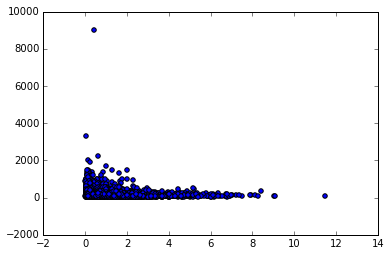

In [64]:
plt.scatter(listings_data4.reviews_per_month, listings_data4.price_y)